In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# 1. Load Dataset

In [36]:
# 1. Load Preprocessed Dataset
file_path = '/content/ev_data_normalized (1).csv'  # Path to the dataset
normalized_df = pd.read_csv(file_path)

# 2. Preprocessing
# Convert to binary


In [37]:
# Convert Electric Vehicle Type to binary values (True/False if needed)
normalized_df['Electric Vehicle Type'] = (normalized_df['Electric Vehicle Type'] > 0).astype(int)


# Handle missing values


In [38]:
# Handle missing values
for col in normalized_df.columns:
    if normalized_df[col].dtype in ['float64', 'int64']:  # Numerical columns
        normalized_df[col] = normalized_df[col].fillna(normalized_df[col].mean())  # Reassign filled column
    else:  # Categorical columns (if any exist)
        normalized_df[col] = normalized_df[col].fillna("Unknown")  # Reassign filled column

# Select target and features

In [39]:
exclude_columns = ['VIN', 'Postal Code', 'Census Tract', 'Electric Vehicle Type']
feature_columns = [col for col in normalized_df.columns if col not in exclude_columns]

X = normalized_df[feature_columns]
y = normalized_df['Electric Vehicle Type']

# 3. Train KMeans Classifier with 2 clusters

In [40]:
# 2. Apply KMeans for Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(X)

# Add KMeans labels as a new feature
X = X.copy()  # Ensure X is a separate DataFrame to avoid warnings
X['Cluster'] = kmeans_labels

# Split data into train and test sets

In [41]:
# 3. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train KNN Classifier with 2 neighbors

In [42]:
# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)  # Set n_neighbors as needed
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

# 4. Evaluate the Model

In [43]:
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34819
           1       1.00      0.99      0.99      9226

    accuracy                           1.00     44045
   macro avg       1.00      1.00      1.00     44045
weighted avg       1.00      1.00      1.00     44045



# Confusion Matrix Visualization

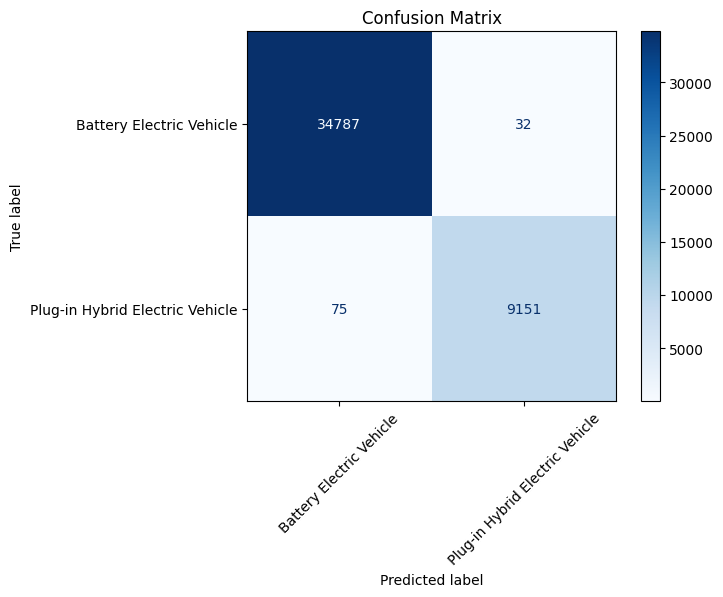

In [44]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Battery Electric Vehicle", "Plug-in Hybrid Electric Vehicle"])
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
